#Financial crisis prediction based on multilayer supervised network analysis


DATOS UTILIZADOS:

Usaron 37 índices bursátiles globales.

Se puede empezar con datos de precios diarios de acciones, bonos, monedas, etc.

Fórmula:
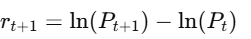

Esto captura los cambios relativos y estandariza la comparación entre activos.


CONSTRUCCION DE LAS REDES DINAMICAS:

En lugar de mirar una sola tabla de datos, se crean ventanas de tiempo (ej. 60 días) para ver cómo cambian las relaciones entre activos a lo largo del tiempo.

En cada ventana, se calcula la correlación de Pearson entre pares de activos.

METODO DE CONSTRUCCION DE LA RED:


*MST (Minimum Spanning Tree)*: estructura simple que muestra las relaciones más fuertes.

In [ ]:
#ip install yfinance pandas numpy networkx matplotlib


# IMPORTAMOS LOS DATOS DE LOS PRECIOS

In [ ]:
import yfinance as yf
import pandas as pd

# Seleccionamos 5 índices para el ejemplo
tickers = ['^GSPC', '^DJI', '^IXIC', '^FTSE', '^N225']

# ESTOS SON: S&P 500, Dow Jones, Nasdaq, FTSE 100, Nikkei 225

data = yf.download(tickers, start="2020-01-01", end="2023-01-01")
data.dropna(inplace=True)


[*********************100%***********************]  5 of 5 completed


In [ ]:
print(data.columns)



MultiIndex([( 'Close',  '^DJI'),
            ( 'Close', '^FTSE'),
            ( 'Close', '^GSPC'),
            ( 'Close', '^IXIC'),
            ( 'Close', '^N225'),
            (  'High',  '^DJI'),
            (  'High', '^FTSE'),
            (  'High', '^GSPC'),
            (  'High', '^IXIC'),
            (  'High', '^N225'),
            (   'Low',  '^DJI'),
            (   'Low', '^FTSE'),
            (   'Low', '^GSPC'),
            (   'Low', '^IXIC'),
            (   'Low', '^N225'),
            (  'Open',  '^DJI'),
            (  'Open', '^FTSE'),
            (  'Open', '^GSPC'),
            (  'Open', '^IXIC'),
            (  'Open', '^N225'),
            ('Volume',  '^DJI'),
            ('Volume', '^FTSE'),
            ('Volume', '^GSPC'),
            ('Volume', '^IXIC'),
            ('Volume', '^N225')],
           names=['Price', 'Ticker'])


In [ ]:

print(data.head())


Price              Close                                                       \
Ticker              ^DJI        ^FTSE        ^GSPC        ^IXIC         ^N225   
Date                                                                            
2020-01-06  28703.380859  7575.299805  3246.280029  9071.469727  23204.859375   
2020-01-07  28583.679688  7573.899902  3237.179932  9068.580078  23575.720703   
2020-01-08  28745.089844  7574.899902  3253.050049  9129.240234  23204.759766   
2020-01-09  28956.900391  7598.100098  3274.699951  9203.429688  23739.869141   
2020-01-10  28823.769531  7587.899902  3265.350098  9178.860352  23850.570312   

Price               High                                                       \
Ticker              ^DJI        ^FTSE        ^GSPC        ^IXIC         ^N225   
Date                                                                            
2020-01-06  28708.019531  7622.399902  3246.840088  9072.410156  23365.359375   
2020-01-07  28685.500000  7

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 691 entries, 2020-01-06 to 2022-12-30
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   (Close, ^DJI)    691 non-null    float64
 1   (Close, ^FTSE)   691 non-null    float64
 2   (Close, ^GSPC)   691 non-null    float64
 3   (Close, ^IXIC)   691 non-null    float64
 4   (Close, ^N225)   691 non-null    float64
 5   (High, ^DJI)     691 non-null    float64
 6   (High, ^FTSE)    691 non-null    float64
 7   (High, ^GSPC)    691 non-null    float64
 8   (High, ^IXIC)    691 non-null    float64
 9   (High, ^N225)    691 non-null    float64
 10  (Low, ^DJI)      691 non-null    float64
 11  (Low, ^FTSE)     691 non-null    float64
 12  (Low, ^GSPC)     691 non-null    float64
 13  (Low, ^IXIC)     691 non-null    float64
 14  (Low, ^N225)     691 non-null    float64
 15  (Open, ^DJI)     691 non-null    float64
 16  (Open, ^FTSE)    691 non-null    float64
 1

# PROBLEMA: TENEMOS DATOS DE APERTURA Y CIERRE

Vamos a utilizar solo los de cierre, con el siguiente codigo:

In [ ]:
close_data = data.xs('Close', axis=1, level=0)
print(close_data.head())


Ticker              ^DJI        ^FTSE        ^GSPC        ^IXIC         ^N225
Date                                                                         
2020-01-06  28703.380859  7575.299805  3246.280029  9071.469727  23204.859375
2020-01-07  28583.679688  7573.899902  3237.179932  9068.580078  23575.720703
2020-01-08  28745.089844  7574.899902  3253.050049  9129.240234  23204.759766
2020-01-09  28956.900391  7598.100098  3274.699951  9203.429688  23739.869141
2020-01-10  28823.769531  7587.899902  3265.350098  9178.860352  23850.570312


<Axes: title={'center': 'Precios de cierre'}, xlabel='Date'>

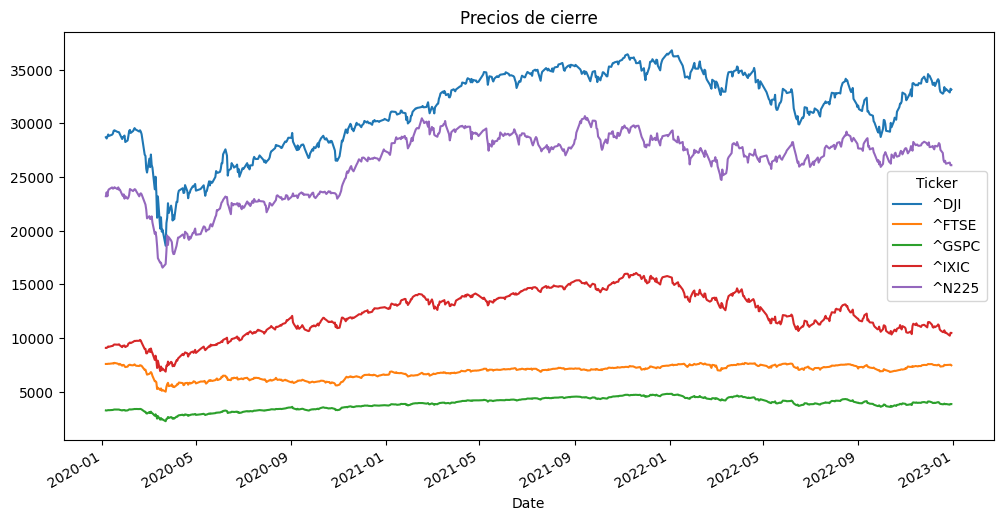

In [ ]:
close_data.plot(figsize=(12,6), title='Precios de cierre')



<Axes: title={'center': 'Retornos logarítmicos'}, xlabel='Date'>

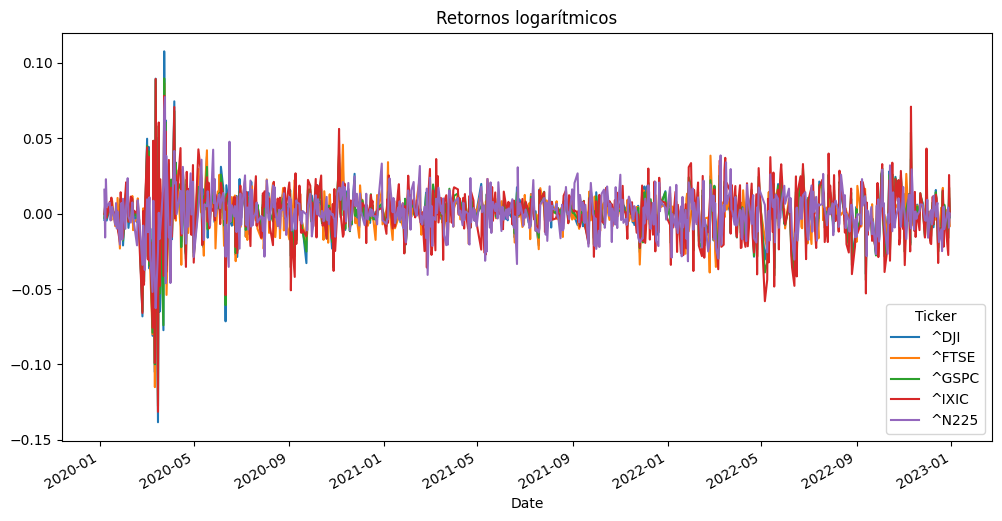

In [ ]:
log_returns = np.log(close_data / close_data.shift(1)).dropna()
log_returns.plot(figsize=(12,6), title='Retornos logarítmicos')


El gráfico de retornos logarítmicos te da una visión clara de la variabilidad diaria de los precios de los activos financieros, y te permite detectar momentos de volatilidad alta, correlaciones entre activos y eventos extremos.

EL EJE X ES LA FECHA

EL EJE Y ES EL r CALCULADO ANTERIORMENTE CON LA FORMULA DEL PAPER

# CALCULAMOS LOS RETORNOS LOGARITMICOS COMO EN EL PAPER

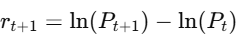

In [ ]:
import numpy as np

log_returns = np.log(data / data.shift(1)).dropna()


/usr/local/lib/python3.11/dist-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


# CALCULAMOS LA MATRIZ DE CORRELACIÓN DE PEARSON

In [ ]:
corr_matrix = log_returns.corr()
print(corr_matrix)


Price             Close                                              High  \
Ticker             ^DJI     ^FTSE     ^GSPC     ^IXIC     ^N225      ^DJI   
Price  Ticker                                                               
Close  ^DJI    1.000000  0.673715  0.964849  0.844600  0.288899  0.743307   
       ^FTSE   0.673715  1.000000  0.625574  0.507105  0.416138  0.741003   
       ^GSPC   0.964849  0.625574  1.000000  0.945159  0.270720  0.689511   
       ^IXIC   0.844600  0.507105  0.945159  1.000000  0.233732  0.565102   
       ^N225   0.288899  0.416138  0.270720  0.233732  1.000000  0.501811   
High   ^DJI    0.743307  0.741003  0.689511  0.565102  0.501811  1.000000   
       ^FTSE   0.356530  0.610648  0.315807  0.236731  0.553820  0.600164   
       ^GSPC   0.725160  0.697351  0.741619  0.681382  0.500305  0.944364   
       ^IXIC   0.603371  0.563221  0.679068  0.721087  0.473956  0.782571   
       ^N225   0.222618  0.347525  0.186378  0.130229  0.839167  0.500874   

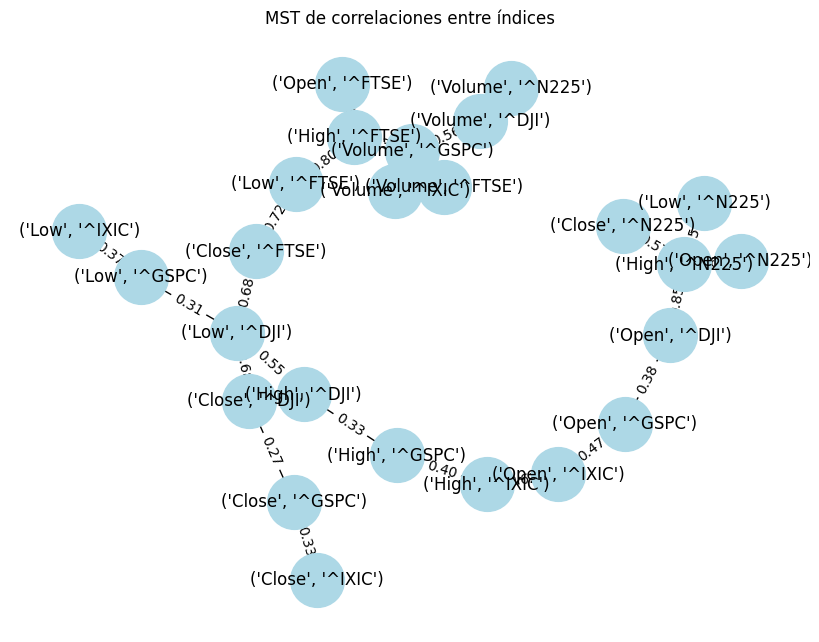

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Convertimos la correlación a distancia: d_ij = sqrt(2(1 - corr))
dist_matrix = np.sqrt(2 * (1 - corr_matrix))

# Creamos grafo completo con distancias como pesos
G = nx.Graph()
for i in dist_matrix.columns:
    for j in dist_matrix.columns:
        if i != j:
            G.add_edge(i, j, weight=dist_matrix.loc[i, j])

# Construimos MST (árbol de mínima expansión)
mst = nx.minimum_spanning_tree(G)

# Dibujamos la red
pos = nx.spring_layout(mst)
plt.figure(figsize=(8, 6))
nx.draw(mst, pos, with_labels=True, node_color='lightblue', node_size=1500, font_size=12)
labels = nx.get_edge_attributes(mst, 'weight')
nx.draw_networkx_edge_labels(mst, pos, edge_labels={k: f"{v:.2f}" for k, v in labels.items()})
plt.title("MST de correlaciones entre índices")
plt.show()


La MST es un subgrafo que conecta todos los nodos usando las conexiones más cercanas posibles (relaciones más fuertes).

No tiene ciclos, y solo tiene
𝑁
−
1
 conexiones si hay
𝑁
nodos.

En finanzas, filtra el “ruido” y destaca las conexiones más relevantes.

# COMO INTERPRETAR LA RED

Nodos cercanos (con líneas cortas) = activos que se comportan muy parecido.

Nodos centrales (con muchas conexiones) = activos influentes o representativos (como el S&P 500).

En contextos de crisis:

La red puede reorganizarse: nuevos nodos se vuelven centrales, o todos los activos se sincronizan (suben las correlaciones).

Esto sirve para detectar transmisión de shocks o riesgo sistémico.

# AHORA LO HAGO CON DATOS DE CIERRE UNICAMENTE

In [ ]:

log_returns_closed = np.log(close_data / close_data.shift(1)).dropna()
corr_matrix = log_returns_closed.corr()
print(corr_matrix)

Ticker      ^DJI     ^FTSE     ^GSPC     ^IXIC     ^N225
Ticker                                                  
^DJI    1.000000  0.673715  0.964849  0.844600  0.288899
^FTSE   0.673715  1.000000  0.625574  0.507105  0.416138
^GSPC   0.964849  0.625574  1.000000  0.945159  0.270720
^IXIC   0.844600  0.507105  0.945159  1.000000  0.233732
^N225   0.288899  0.416138  0.270720  0.233732  1.000000


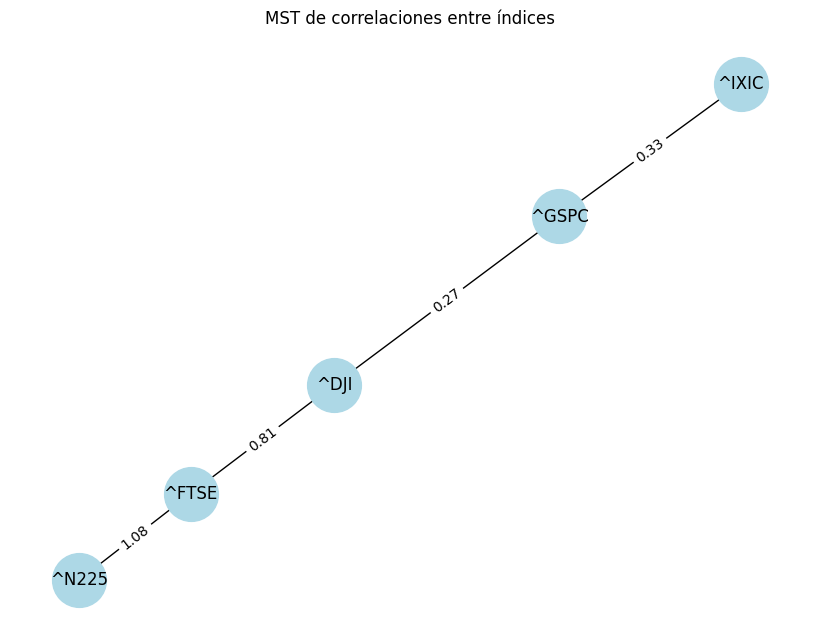

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Convertimos la correlación a distancia: d_ij = sqrt(2(1 - corr))
dist_matrix = np.sqrt(2 * (1 - corr_matrix))

# Creamos grafo completo con distancias como pesos
G = nx.Graph()
for i in dist_matrix.columns:
    for j in dist_matrix.columns:
        if i != j:
            G.add_edge(i, j, weight=dist_matrix.loc[i, j])

# Construimos MST (árbol de mínima expansión)
mst = nx.minimum_spanning_tree(G)

# Dibujamos la red
pos = nx.spring_layout(mst)
plt.figure(figsize=(8, 6))
nx.draw(mst, pos, with_labels=True, node_color='lightblue', node_size=1500, font_size=12)
labels = nx.get_edge_attributes(mst, 'weight')
nx.draw_networkx_edge_labels(mst, pos, edge_labels={k: f"{v:.2f}" for k, v in labels.items()})
plt.title("MST de correlaciones entre índices")
plt.show()

# ACÁ TUVIMOS OTRO PROBLEMA

CON DATOS DE CIERRE, SOLO NOS DA UNA LINEA RECTA, Y DEBERÍAMOS AGREGAR TICKERS PARA UN ANALISIS MÁS PROFUNDO

# OPCIONES PARA MEJORAR EL GRAFICO DE RED

Analizar datos del paper:

LAS OPCIONES DE MEJORAR ESTE ANALISIS SON:
 1. Agregar más activos financieros
Cuanto más activos tenés, más interesante y rica es la red.

Podés usar: acciones de empresas grandes, ETFs, otros índices globales, bonos, monedas, commodities.

2. Usar múltiples fuentes de datos para cada activo
En lugar de solo usar Close, podés construir un vector de características por día, por ejemplo:


 3. Segmentar en el tiempo (ventanas)
Como se hace en el paper que viste: cortar la serie en ventanas móviles (por ejemplo, 60 días) y ver cómo cambia la red.

Aunque uses pocos activos, el dinamismo temporal te muestra mucho.

4. Cambiar de MST a otra red filtrada (PMFG, o sin filtro)
El MST simplifica al máximo.

Usar una red más rica como PMFG o simplemente dejar más conexiones con un threshold de correlación (ej:
𝜌
>
0.6
ρ>0.6) te da una red más completa.


In [ ]:
# EJEMPLO 1

# tickers = ['^GSPC', '^DJI', '^IXIC', '^FTSE', '^N225', '^HSI', '^STI', '^BVSP', '^GDAXI', '^FCHI', '^AEX', '^MXX', '^BSESN']


#EJEMPLO 2

# features = ['Open', 'High', 'Low', 'Close', 'Volume']



# EJEMPLO DE MÁS VARIABLES

In [ ]:
tickers = [
    '^GSPC',  # S&P 500 (USA)
    '^DJI',   # Dow Jones (USA)
    '^IXIC',  # Nasdaq (USA)
    '^FTSE',  # FTSE 100 (UK)
    '^GDAXI', # DAX (Germany)
    '^FCHI',  # CAC 40 (France)
    '^N225',  # Nikkei 225 (Japan)
    '^HSI',   # Hang Seng (Hong Kong)
    '^STI',   # Straits Times (Singapore)
    '^BVSP',  # Bovespa (Brazil)
    '^MXX',   # IPC Mexico
    '^BSESN', # Sensex 30 (India)
    '^AXJO',  # ASX 200 (Australia)
    '^AEX',   # Netherlands
    '^KOSPI'  # Korea
]


[*********************100%***********************]  14 of 14 completed
/usr/local/lib/python3.11/dist-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


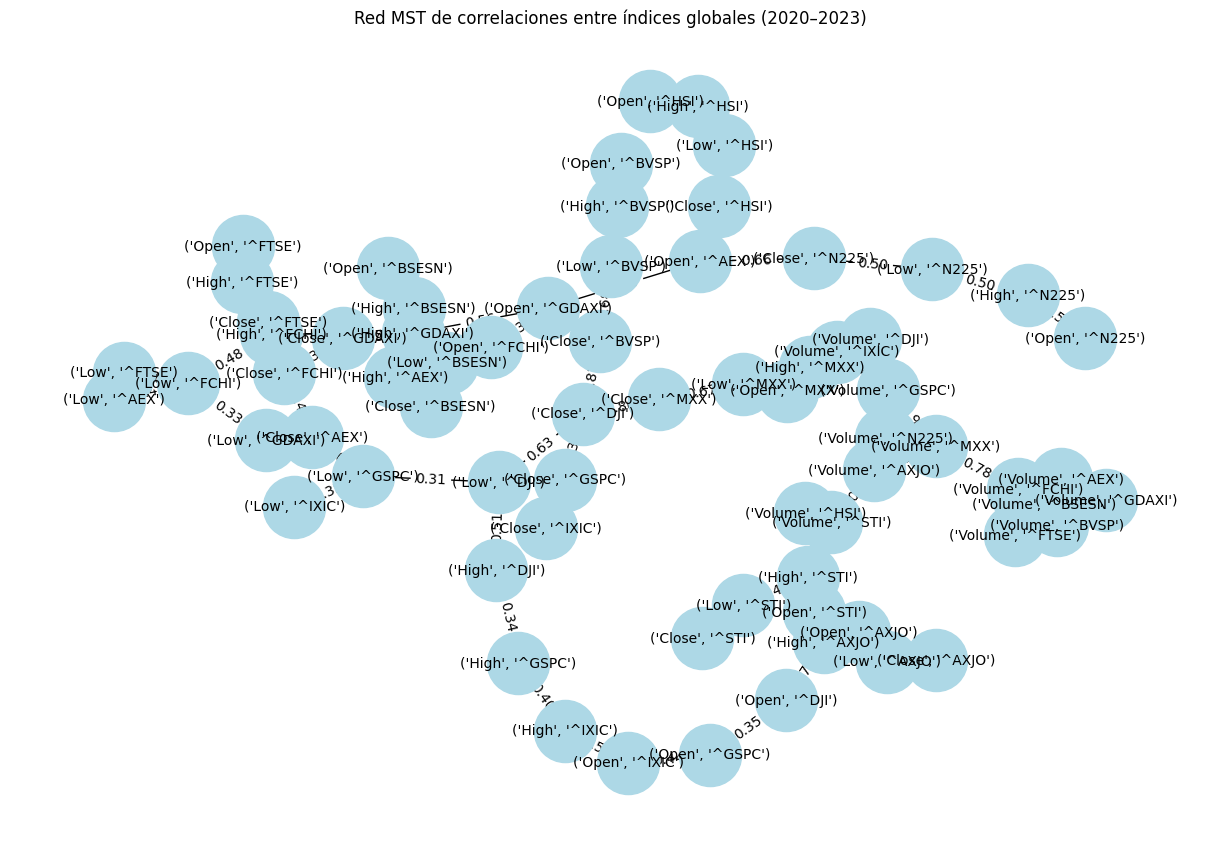

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Descargar datos
tickers = ['^GSPC', '^DJI', '^IXIC', '^FTSE', '^GDAXI', '^FCHI', '^N225', '^HSI', '^STI', '^BVSP',
           '^MXX', '^BSESN', '^AXJO', '^AEX']

data = yf.download(tickers, start="2020-01-01", end="2023-01-01")
data.dropna(axis=0, inplace=True)  # eliminar días con valores faltantes

# Calcular retornos logarítmicos
log_returns = np.log(data / data.shift(1)).dropna()

# Calcular matriz de correlación
corr_matrix = log_returns.corr()

# Convertir correlación a distancia
dist_matrix = np.sqrt(2 * (1 - corr_matrix))

# Crear grafo completo
G = nx.Graph()
for i in dist_matrix.columns:
    for j in dist_matrix.columns:
        if i != j:
            G.add_edge(i, j, weight=dist_matrix.loc[i, j])

# Crear Minimum Spanning Tree (MST)
mst = nx.minimum_spanning_tree(G)

# Dibujar MST
pos = nx.spring_layout(mst, seed=42)
plt.figure(figsize=(12, 8))
nx.draw(mst, pos, with_labels=True, node_color='lightblue', node_size=2000, font_size=10)
edge_labels = nx.get_edge_attributes(mst, 'weight')
nx.draw_networkx_edge_labels(mst, pos, edge_labels={k: f"{v:.2f}" for k, v in edge_labels.items()})
plt.title("Red MST de correlaciones entre índices globales (2020–2023)")
plt.grid(True)
plt.show()


# MISMO ERROR QUE ANTES, PERO AHORA TRATO DE AJUSTAR SOLO A VALORES DE CIERRE

In [ ]:
data = yf.download(tickers, start="2020-01-01", end="2023-01-01", group_by='ticker', auto_adjust=True)
# Construir DataFrame limpio de precios de cierre ajustados
close_data = pd.DataFrame()
for ticker in tickers:
    if ticker in data.columns.levels[0]:  # chequea que el ticker esté en los datos
        close_data[ticker] = data[ticker]['Close']

print(close_data.head())


[*********************100%***********************]  14 of 14 completed


                  ^GSPC          ^DJI        ^IXIC        ^FTSE        ^GDAXI  \
Date                                                                            
2020-01-02  3257.850098  28868.800781  9092.190430  7604.299805  13385.929688   
2020-01-03  3234.850098  28634.880859  9020.769531  7622.399902  13219.139648   
2020-01-06  3246.280029  28703.380859  9071.469727  7575.299805  13126.990234   
2020-01-07  3237.179932  28583.679688  9068.580078  7573.899902  13226.830078   
2020-01-08  3253.050049  28745.089844  9129.240234  7574.899902  13320.179688   

                  ^FCHI         ^N225          ^HSI         ^STI     ^BVSP  \
Date                                                                         
2020-01-02  6041.500000           NaN  28543.519531  3252.000000  118573.0   
2020-01-03  6044.160156           NaN  28451.500000  3238.820068  117707.0   
2020-01-06  6013.589844  23204.859375  28226.189453  3218.860107  116878.0   
2020-01-07  6012.350098  23575.720703  283

In [ ]:
# Calcular retornos logarítmicos
log_returns = np.log(close_data / close_data.shift(1)).dropna()

# Calcular matriz de correlación
corr_matrix = log_returns.corr()

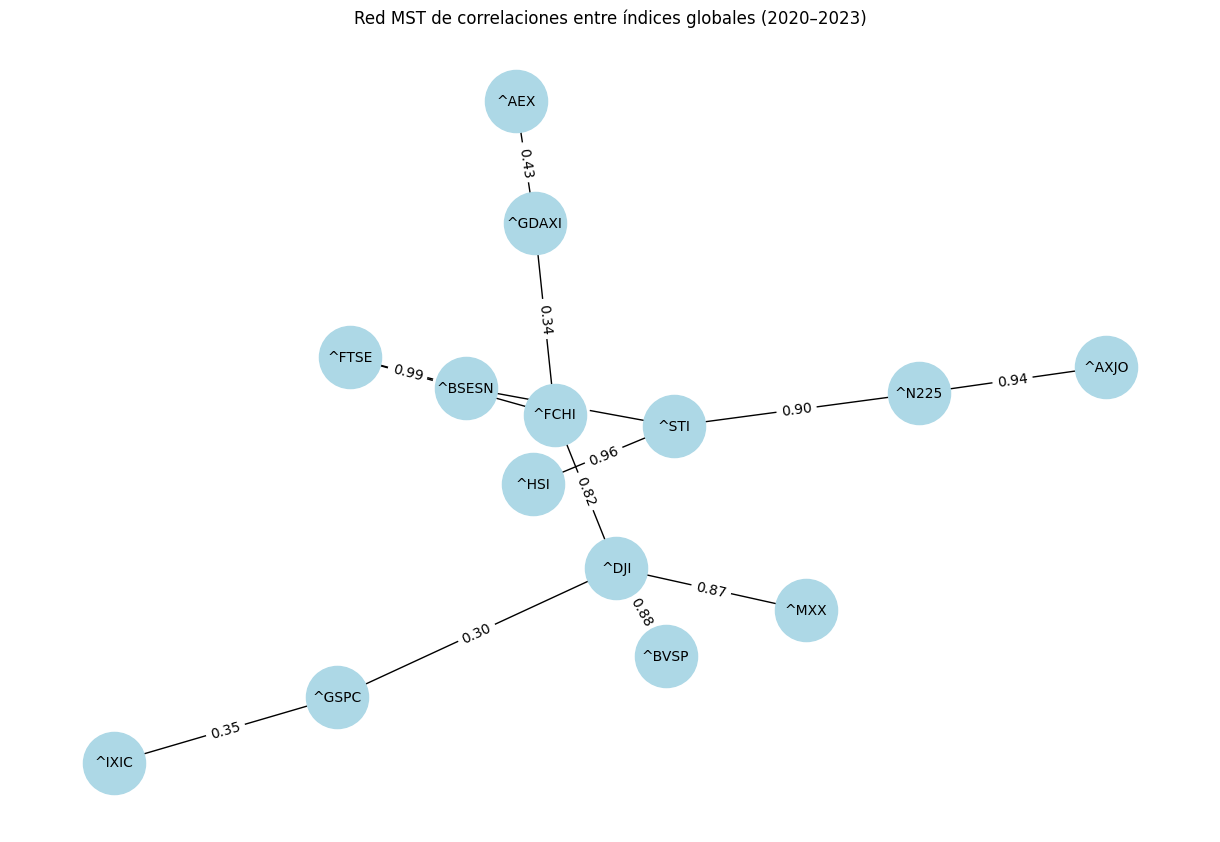

In [ ]:


# Convertir correlación a distancia
dist_matrix = np.sqrt(2 * (1 - corr_matrix))

# Crear grafo completo
G = nx.Graph()
for i in dist_matrix.columns:
    for j in dist_matrix.columns:
        if i != j:
            G.add_edge(i, j, weight=dist_matrix.loc[i, j])

# Crear Minimum Spanning Tree (MST)
mst = nx.minimum_spanning_tree(G)

# Dibujar MST
pos = nx.spring_layout(mst, seed=42)
plt.figure(figsize=(12, 8))
nx.draw(mst, pos, with_labels=True, node_color='lightblue', node_size=2000, font_size=10)
edge_labels = nx.get_edge_attributes(mst, 'weight')
nx.draw_networkx_edge_labels(mst, pos, edge_labels={k: f"{v:.2f}" for k, v in edge_labels.items()})
plt.title("Red MST de correlaciones entre índices globales (2020–2023)")
plt.grid(True)
plt.show()